In [1]:
from networkx import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
social_network = generators.random_partition_graph([30,]*9,  0.6, 2/1000)

In [4]:
partitions = social_network.graph['partition']
p_layouts = [random_layout(social_network.subgraph(p)) for p in partitions]

In [5]:
pos = [ [i/3, j/3] for i in range(3) for j in range(3)]
for l,po in zip(p_layouts,pos):
    for k in l:
        l[k]=l[k]*0.25+po

In [6]:
sn_layout = {}
for l in p_layouts:
    sn_layout.update(l)

In [7]:
len(social_network.edges())

2474

In [8]:
n = len(social_network.nodes())
k = 2*len(social_network.edges())//n
small_world = generators.watts_strogatz_graph(n,k, 0 )
sw_layout = spring_layout(small_world)
len(small_world.edges())

2430

In [9]:
def run(t, network, states):
    for i in range(t):
        try:
            u = np.random.choice(np.where(states == 1)[0])
        except:
            return -1
        try:
            v = np.random.choice(network.neighbors(u))
        except:
            return -1
        if states[v] == 1:
            states[[u,v][np.random.choice(2)]]=2
        else:
            states[u] = states[v] = max(1, states[v])

In [10]:
def simulate(network, layout):
    states = np.zeros(len(network.nodes()), dtype='int')
    for i in range(1):
        start = np.random.choice(network.nodes())
        print("start=", start)
        states[start]=1
    run(1000, network, states)
    plt.axis('off')
    draw_networkx_nodes(network, pos=layout,node_size=40, node_color=['grb'[x] for x in states], with_labels=False)
    draw_networkx_edges(network, pos=layout,alpha=0.3, width=0.2, with_labels=False)


start= 107


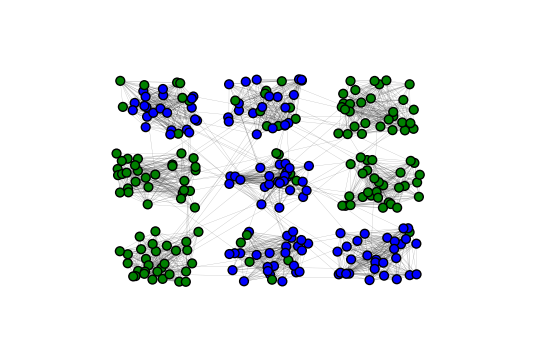

In [11]:
simulate(social_network, sn_layout)

start= 4


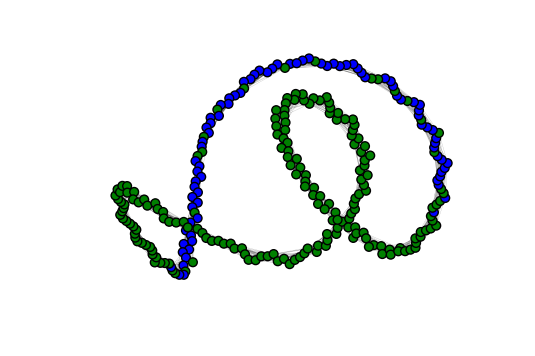

In [12]:
simulate(small_world, sw_layout)

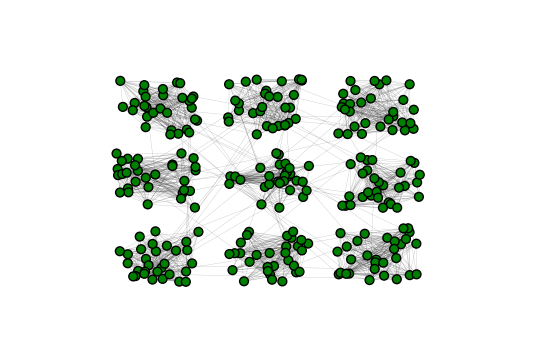

In [13]:
network = social_network
layout = sn_layout
states = np.zeros(len(network.nodes()), dtype='int')
plt.axis('off')
node_collections = draw_networkx_nodes(network, pos=layout,node_size=40, node_color=['grb'[x] for x in states], with_labels=False)
edge_collections = draw_networkx_edges(network, pos=layout,alpha=0.3, width=0.2, with_labels=False)
fig = plt.gcf()

In [14]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [15]:
states[:]=0
start = np.random.choice(network.nodes())
print("start=", start)
states[start]=1
def animate(tick):
    if tick%100==0:
        states[:]=0
        start = np.random.choice(network.nodes())
        states[start]=1
    else:
        run(4, network, states)
    node_collections.set_color([['#7f7f7f','#0000ff','#5050ff'][x] for x in states])
    return (node_collections,)
anim = animation.FuncAnimation(fig, animate, 
                               frames=100*10, interval=40, blit=True)

start= 221


In [16]:
anim

In [17]:
anim.save('1rumor.gif', dpi=80, writer='imagemagick')

In [18]:
def run2(t, network, states):
    for i in range(t):
        try:
            u = np.random.choice(np.where(states%2 == 1)[0])
        except:
            return -1
        try:
            v = np.random.choice(network.neighbors(u))
        except:
            return -1
        x, y = states[u], states[v]
        if y == x:
            states[[u,v][np.random.choice(2)]] = x+1
        elif y in [0,x+1]:
            states[u] = states[v] = max(x,y)
        elif y == 4-x:
            states[u] = np.random.choice([1,3])
            states[v] = np.random.choice([1,3])
    return 0
            

In [19]:
states[:]=0
def animate(tick):
    if tick%100==0:
        states[:]=0
        start = np.random.choice(network.nodes())
        states[start]=1
        start = np.random.choice(network.nodes())
        states[start]=3
    else:
        run2(5, network, states)
    node_collections.set_color([['#7f7f7f','#0000ff','#5050ff', '#ff0000','#ff5050'][x] for x in states])
    return (node_collections,)
anim = animation.FuncAnimation(fig, animate, 
                               frames=100*10, interval=40, blit=True)
anim

In [20]:
anim.save('2theory.gif', dpi=80, writer='imagemagick')